In [1]:
import numpy as np
import seaborn
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Create 2-dimensional latent field

In [3]:
n = 40
m = 40

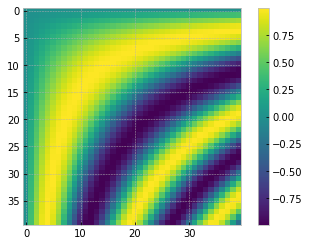

In [4]:
def func(x, y):
    return np.sin(y * x)

xaxis = np.linspace(0, 4, n)
yaxis = np.linspace(0, 4, m)
x, y = np.meshgrid(xaxis, yaxis)
result = func(x, y)

plt.imshow(result)
plt.colorbar()

In [5]:
latent_2d = np.zeros_like(result)

In [6]:
latent_2d[result > -0.5] = 1
latent_2d[result > 0.5] = 2
#latent_2d[0 >= result] = 1

In [7]:
np.unique(latent_2d)

array([ 0.,  1.,  2.])

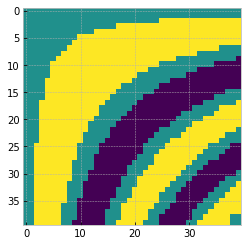

In [8]:
plt.imshow(latent_2d, interpolation="none")

### Sample

In [9]:
f = 4
c1 = scipy.stats.multivariate_normal([7.9, 7.5, 11, 3], np.eye(f) * 0.35)
c2 = scipy.stats.multivariate_normal([8, 7.9, 10.7, 2.9], np.eye(f) * 1.55)
c3 = scipy.stats.multivariate_normal([8.5, 9, 9, 1], np.eye(f) * 0.95)

In [11]:
obs = np.zeros((m,n,f))
np.shape(obs)

(40, 40, 4)

In [12]:
for i, x in enumerate(latent_2d[:,0]):
    for j, y in enumerate(latent_2d[0,:]):
        # generate a 2-d random vector at each point
        if latent_2d[i, j] == 0:
            obs[i,j,:] = c1.rvs()
        elif latent_2d[i, j] == 1:
            obs[i,j,:] = c2.rvs()
        elif latent_2d[i, j] == 2:
            obs[i,j,:] = c3.rvs()

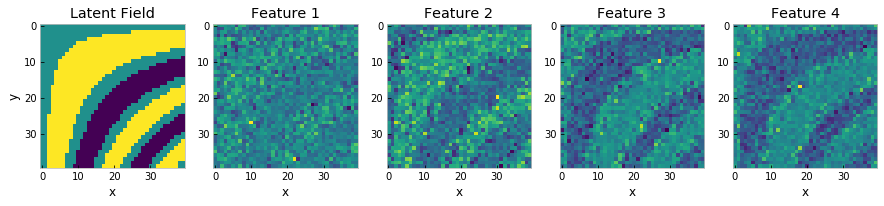

In [13]:
fig, ax = plt.subplots(ncols=5, figsize=(15,7))
for i in range(f+1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest")
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(obs[:,:,i-1], interpolation="nearest")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")
    

### BaySeg initialization

In [14]:
np.shape(obs)

(40, 40, 4)

In [16]:
clf = bayseg.BaySeg(obs, 3, stamp=4)

In [17]:
clf.fit(10, verbose="energy")

  0%|                                                                                        | 0/10 [00:00<?, ?it/s]

likelihood energy: [[  2.59792982   5.80796176   2.38745346]
 [  3.69133776   0.36665681   1.55380402]
 [  6.09023358   7.31098956   2.11794157]
 ..., 
 [  2.22654075  16.15669899   3.54869896]
 [  7.63678341   2.0550054    2.38278464]
 [  6.95299261  -0.03750271   2.51541913]]
gibbs energy: [[ 2.  2.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 2.  3.  1.]]
total_energy: [[  4.59792982   7.80796176   4.38745346]
 [  6.69133776   2.36665681   4.55380402]
 [  9.09023358  10.31098956   5.11794157]
 ..., 
 [  5.22654075  19.15669899   6.54869896]
 [ 10.63678341   5.0550054    5.38278464]
 [  8.95299261   2.96249729   3.51541913]]
Labels probability: [[  4.39633642e-01   1.77415582e-02   5.42624800e-01]
 [  1.17619509e-02   8.88514329e-01   9.97237203e-02]
 [  1.83819751e-02   5.42281246e-03   9.76195212e-01]
 ..., 
 [  7.89539997e-01   7.04017211e-07   2.10459299e-01]
 [  2.18401101e-03   5.79949543e-01   4.17866446e-01]
 [  1.58605242e-03   6.33806367e-01   

 10%|████████                                                                        | 1/10 [00:00<00:00,  9.39it/s]

likelihood energy: [[  2.57878939   5.90894522   2.40591574]
 [  3.66352247   0.3679746    1.55024616]
 [  6.0476456    7.28857479   2.11582052]
 ..., 
 [  2.28444623  16.2383188    3.50988693]
 [  7.61137324   2.07144742   2.40680126]
 [  6.93146778  -0.05506597   2.49310064]]
gibbs energy: [[ 2.  2.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 3.  2.  3.]
 [ 2.  3.  2.]
 [ 2.  2.  1.]]
total_energy: [[  4.57878939   7.90894522   4.40591574]
 [  6.66352247   2.3679746    4.55024616]
 [  9.0476456   10.28857479   5.11582052]
 ..., 
 [  5.28444623  18.2383188    6.50988693]
 [  9.61137324   5.07144742   4.40680126]
 [  8.93146778   1.94493403   3.49310064]]
Labels probability: [[  4.49538528e-01   1.60878726e-02   5.34373599e-01]
 [  1.20995486e-02   8.87772944e-01   1.00127508e-01]
 [  1.91244493e-02   5.52917378e-03   9.75346377e-01]
 ..., 
 [  7.73018180e-01   1.82976085e-06   2.26979990e-01]
 [  3.61288954e-03   3.38469404e-01   6.57917706e-01]
 [  7.61596749e-04   8.24020726e-01   

 20%|████████████████                                                                | 2/10 [00:00<00:00,  8.40it/s]

likelihood energy: [[  2.59296235   5.91023707   2.38437583]
 [  3.59373624   0.36620514   1.47011607]
 [  6.12260137   7.22851593   2.20183676]
 ..., 
 [  2.2908798   16.25004112   3.57737984]
 [  7.60315502   2.0624114    2.2908757 ]
 [  6.8323871   -0.05762365   2.36668575]]
gibbs energy: [[ 2.  2.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 3.  1.  2.]
 [ 3.  1.  3.]
 [ 1.  3.  0.]]
total_energy: [[  4.59296235   7.91023707   4.38437583]
 [  6.59373624   2.36620514   4.47011607]
 [  9.12260137  10.22851593   5.20183676]
 ..., 
 [  5.2908798   17.25004112   5.57737984]
 [ 10.60315502   3.0624114    5.2908757 ]
 [  7.8323871    2.94237635   2.36668575]]
Labels probability: [[  4.40880755e-01   1.59825855e-02   5.43136659e-01]
 [  1.28354648e-02   8.79842691e-01   1.07321844e-01]
 [  1.93162421e-02   6.39190109e-03   9.74291857e-01]
 ..., 
 [  5.71136980e-01   3.65546402e-06   4.28859364e-01]
 [  4.79147067e-04   9.02344090e-01   9.71767630e-02]
 [  2.69980860e-03   3.58953061e-01   

 30%|████████████████████████                                                        | 3/10 [00:00<00:00,  8.50it/s]

likelihood energy: [[  2.59296235   5.95544748   2.38230284]
 [  3.59373624   0.38742045   1.46566474]
 [  6.12260137   7.32055589   2.1626246 ]
 ..., 
 [  2.2908798   16.24063012   3.64932856]
 [  7.60315502   2.10089922   2.33270269]
 [  6.8323871   -0.04966507   2.38921848]]
gibbs energy: [[ 2.  3.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 2.  2.  2.]
 [ 2.  1.  3.]
 [ 2.  2.  1.]]
total_energy: [[  4.59296235   8.95544748   4.38230284]
 [  6.59373624   2.38742045   4.46566474]
 [  9.12260137  10.32055589   5.1626246 ]
 ..., 
 [  4.2908798   18.24063012   5.64932856]
 [  9.60315502   3.10089922   5.33270269]
 [  8.8323871    1.95033493   3.38921848]]
Labels probability: [[  4.44990574e-01   5.67214849e-03   5.49337278e-01]
 [  1.30706148e-02   8.77153808e-01   1.09775577e-01]
 [  1.86019109e-02   5.61425997e-03   9.75783829e-01]
 ..., 
 [  7.95506911e-01   6.95575652e-07   2.04492394e-01]
 [  1.35281797e-03   9.01847653e-01   9.67995293e-02]
 [  8.28639145e-04   8.07611928e-01   

 40%|████████████████████████████████                                                | 4/10 [00:00<00:00,  8.47it/s]

likelihood energy: [[  2.57030844   6.03303413   2.45941731]
 [  3.59941433   0.42924507   1.41426144]
 [  5.94800049   7.39710814   2.26113931]
 ..., 
 [  2.32479902  16.60099093   3.581469  ]
 [  7.58148914   2.07282301   2.31315651]
 [  6.84354197  -0.04993119   2.25571295]]
gibbs energy: [[ 2.  3.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 3.  2.  2.]
 [ 3.  1.  2.]
 [ 1.  3.  0.]]
total_energy: [[  4.57030844   9.03303413   4.45941731]
 [  6.59941433   2.42924507   4.41426144]
 [  8.94800049  10.39710814   5.26113931]
 ..., 
 [  5.32479902  18.60099093   5.581469  ]
 [ 10.58148914   3.07282301   4.31315651]
 [  7.84354197   2.95006881   2.25571295]]
Labels probability: [[  4.69747299e-01   5.41660477e-03   5.24836096e-01]
 [  1.34015176e-02   8.67432081e-01   1.19166401e-01]
 [  2.42988976e-02   5.70488792e-03   9.69996214e-01]
 ..., 
 [  5.63816978e-01   9.66854812e-07   4.36182055e-01]
 [  4.25102076e-04   7.75292342e-01   2.24282556e-01]
 [  2.49021874e-03   3.32235389e-01   

 50%|████████████████████████████████████████                                        | 5/10 [00:00<00:00,  8.48it/s]

likelihood energy: [[  2.61158065   5.9870879    2.45941731]
 [  3.66438317   0.43202976   1.41426144]
 [  6.06826606   7.36982658   2.26113931]
 ..., 
 [  2.26768037  16.46893266   3.581469  ]
 [  7.65090567   2.0806178    2.31315651]
 [  6.89874387  -0.04052248   2.25571295]]
gibbs energy: [[ 2.  3.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 2.  3.  2.]
 [ 3.  0.  3.]
 [ 1.  2.  1.]]
total_energy: [[  4.61158065   8.9870879    4.45941731]
 [  6.66438317   2.43202976   4.41426144]
 [  9.06826606  10.36982658   5.26113931]
 ..., 
 [  4.26768037  19.46893266   5.581469  ]
 [ 10.65090567   2.0806178    5.31315651]
 [  7.89874387   1.95947752   3.25571295]]
Labels probability: [[  4.59362040e-01   5.77958225e-03   5.34858377e-01]
 [  1.25995311e-02   8.67844894e-01   1.19555575e-01]
 [  2.16015364e-02   5.87792570e-03   9.72520538e-01]
 ..., 
 [  7.88146285e-01   1.97145489e-07   2.11853518e-01]
 [  1.82425449e-04   9.61865071e-01   3.79525036e-02]
 [  2.06391979e-03   7.83580139e-01   

 60%|████████████████████████████████████████████████                                | 6/10 [00:00<00:00,  8.38it/s]

likelihood energy: [[  2.61158065   6.02773643   2.44223961]
 [  3.66438317   0.44459462   1.41009616]
 [  6.06826606   7.30999094   2.29483156]
 ..., 
 [  2.26768037  16.37803295   3.54850359]
 [  7.65090567   2.09303741   2.29451147]
 [  6.89874387  -0.02918166   2.23488286]]
gibbs energy: [[ 2.  3.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 2.  2.  2.]
 [ 1.  1.  2.]
 [ 2.  2.  1.]]
total_energy: [[  4.61158065   9.02773643   4.44223961]
 [  6.66438317   2.44459462   4.41009616]
 [  9.06826606  10.30999094   5.29483156]
 ..., 
 [  4.26768037  18.37803295   5.54850359]
 [  8.65090567   3.09303741   4.29451147]
 [  8.89874387   1.97081834   3.23488286]]
Labels probability: [[  4.55248062e-01   5.49966224e-03   5.39252275e-01]
 [  1.27311342e-02   8.65960290e-01   1.21308576e-01]
 [  2.23123665e-02   6.44571909e-03   9.71241914e-01]
 ..., 
 [  7.82589418e-01   5.82754599e-07   2.17409999e-01]
 [  2.95643677e-03   7.66514036e-01   2.30529528e-01]
 [  7.63571811e-04   7.79129622e-01   

 70%|████████████████████████████████████████████████████████                        | 7/10 [00:00<00:00,  8.37it/s]

likelihood energy: [[  2.65758403   6.0136207    2.45372889]
 [  3.61826939   0.44501363   1.40458369]
 [  6.11430362   7.31119489   2.2621857 ]
 ..., 
 [  2.24434426  16.42338411   3.54358025]
 [  7.65255071   2.09072753   2.3377482 ]
 [  6.82955932  -0.03128213   2.22387599]]
gibbs energy: [[ 2.  2.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 1.  3.  1.]
 [ 3.  2.  3.]
 [ 2.  3.  1.]]
total_energy: [[  4.65758403   8.0136207    4.45372889]
 [  6.61826939   2.44501363   4.40458369]
 [  9.11430362  10.31119489   5.2621857 ]
 ..., 
 [  3.24434426  19.42338411   4.54358025]
 [ 10.65255071   4.09072753   5.3377482 ]
 [  8.82955932   2.96871787   3.22387599]]
Labels probability: [[  4.42283403e-01   1.54238373e-02   5.42292759e-01]
 [  1.33198590e-02   8.64811739e-01   1.21868402e-01]
 [  2.06633650e-02   6.24306381e-03   9.73093571e-01]
 ..., 
 [  7.85706315e-01   7.39252012e-08   2.14293611e-01]
 [  1.09662965e-03   7.75931854e-01   2.22971516e-01]
 [  1.60259726e-03   5.62542702e-01   

 80%|████████████████████████████████████████████████████████████████                | 8/10 [00:00<00:00,  8.28it/s]

likelihood energy: [[  2.53714134e+00   6.06296884e+00   2.44980874e+00]
 [  3.53486149e+00   4.85544675e-01   1.41563975e+00]
 [  6.01554841e+00   7.41342029e+00   2.25778367e+00]
 ..., 
 [  2.29271087e+00   1.64627275e+01   3.50004360e+00]
 [  7.41873188e+00   2.16976544e+00   2.35923338e+00]
 [  6.67084860e+00   1.26236359e-02   2.24716684e+00]]
gibbs energy: [[ 2.  2.  2.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 1.  2.  3.]
 [ 3.  1.  3.]
 [ 1.  2.  1.]]
total_energy: [[  4.53714134   8.06296884   4.44980874]
 [  6.53486149   2.48554468   4.41563975]
 [  9.01554841  10.41342029   5.25778367]
 ..., 
 [  3.29271087  18.4627275    6.5000436 ]
 [ 10.41873188   3.16976544   5.35923338]
 [  7.6708486    2.01262364   3.24716684]]
Labels probability: [[  4.71545301e-01   1.38763740e-02   5.14578325e-01]
 [  1.49963453e-02   8.60164235e-01   1.24839420e-01]
 [  2.26759146e-02   5.60372440e-03   9.71720361e-01]
 ..., 
 [  9.61109052e-01   2.48037961e-07   3.88907003e-02]
 [  6.38911609e-04  

 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [00:01<00:00,  8.32it/s]

likelihood energy: [[  2.54763481e+00   6.04887762e+00   2.44980874e+00]
 [  3.53170805e+00   4.78528796e-01   1.41563975e+00]
 [  6.10415072e+00   7.42295998e+00   2.25778367e+00]
 ..., 
 [  2.21982388e+00   1.63613737e+01   3.50004360e+00]
 [  7.43521029e+00   2.18814676e+00   2.35923338e+00]
 [  6.65584056e+00   1.13884960e-02   2.24716684e+00]]
gibbs energy: [[ 2.  3.  1.]
 [ 3.  2.  3.]
 [ 3.  3.  3.]
 ..., 
 [ 1.  2.  2.]
 [ 2.  3.  2.]
 [ 3.  3.  1.]]
total_energy: [[  4.54763481   9.04887762   3.44980874]
 [  6.53170805   2.4785288    4.41563975]
 [  9.10415072  10.42295998   5.25778367]
 ..., 
 [  3.21982388  18.36137365   5.5000436 ]
 [  9.43521029   5.18814676   4.35923338]
 [  9.65584056   3.0113885    3.24716684]]
Labels probability: [[  2.49455098e-01   2.76775390e-03   7.47777149e-01]
 [  1.49524494e-02   8.60965453e-01   1.24082098e-01]
 [  2.07942995e-02   5.56150985e-03   9.73644191e-01]
 ..., 
 [  9.07225323e-01   2.40892706e-07   9.27744361e-02]
 [  4.32847222e-03  

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.31it/s]


In [25]:
len(clf.labels[-1])

1600

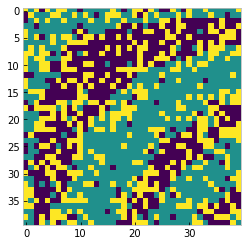

In [20]:
plt.imshow(clf.labels[-1].reshape(n,m))
plt.grid(False)

In [27]:
latent_2d.flatten()

array([ 1.,  1.,  1., ...,  2.,  1.,  1.])

In [36]:
energy_like = clf.calc_energy_like(clf.mus[-1], clf.covs[-1])
energy_like

array([[  2.54014697e+00,   6.04392709e+00,   2.44517049e+00],
       [  3.54438652e+00,   5.11956097e-01,   1.37883933e+00],
       [  6.15802543e+00,   7.65259782e+00,   2.29906222e+00],
       ..., 
       [  2.20907702e+00,   1.65187748e+01,   3.55017381e+00],
       [  7.44257976e+00,   2.20428307e+00,   2.32871901e+00],
       [  6.67903161e+00,   1.62177236e-02,   2.19311100e+00]])

In [38]:
gibbs_energy = clf._calc_gibbs_energy_vect(clf.labels[-1], clf.betas[-1])
gibbs_energy

array([[ 1.,  3.,  2.],
       [ 3.,  2.,  3.],
       [ 3.,  3.,  3.],
       ..., 
       [ 1.,  2.,  2.],
       [ 3.,  2.,  2.],
       [ 1.,  3.,  0.]])

In [ ]:
def _calc_labels_prob(te, t):
    """"Calculate labels probability for array of total energies (te) and totally arbitrary skalar value t."""
    return (np.exp(-te/t).T / np.sum(np.exp(-te/t), axis=1)).T

In [43]:
total_energy = energy_like + gibbs_energy
labels_prob = _calc_labels_prob(total_energy, 1.)

In [93]:
import copy

In [102]:
labels = copy.copy(clf.labels[2])

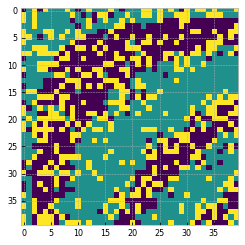

In [103]:
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]))

In [104]:
new_labels = copy.copy(labels)

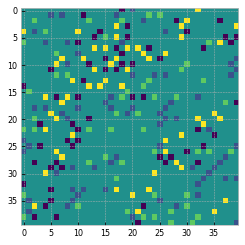

In [105]:
new_labels[clf.colors[0]] = draw_labels_vect(labels_prob[clf.colors[0]])
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]) - new_labels.reshape(clf.shape[0], clf.shape[1]))

In [106]:
newer_labels = copy.copy(labels)

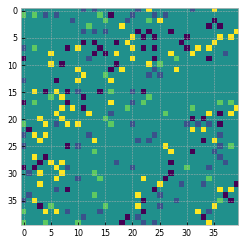

In [107]:
newer_labels[clf.colors[1]] = draw_labels_vect(labels_prob[clf.colors[1]])
plt.imshow(labels.reshape(clf.shape[0], clf.shape[1]) - newer_labels.reshape(clf.shape[0], clf.shape[1]))

In [56]:

def draw_labels_vect(labels_prob):
    """
    Vectorized draw of the label for each elements respective labels probability.
    :param labels_prob: (n_elements x n_labels) ndarray containing the element-specific labels probabilites
    :return: (n_elements)-long array of labels
    """
    # draw a random number between 0 and 1 for each element
    r = np.random.rand(len(labels_prob))
    # cumsum labels probabilities for each element
    p = np.cumsum(labels_prob, axis=1)
    # calculate difference between random draw and cumsum probabilities
    d = (p.T - r).T
    # compare and count to get label
    return np.count_nonzero(np.greater_equal(0, d), axis=1)

In [29]:
latent_2d.reshape(clf.shape[0]*clf.shape[1])

array([ 1.,  1.,  1., ...,  2.,  1.,  1.])

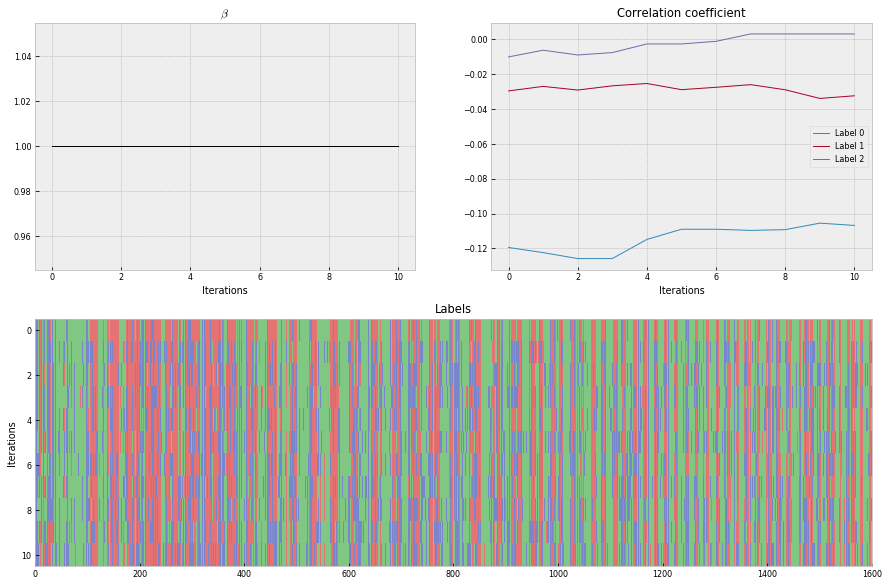

In [21]:
clf.diagnostics_plot()

In [30]:
from bayseg import pseudocolor

In [28]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
np.array(pseudocolor(coords, (4,4)))

array([[ 0,  2,  8, 10],
       [ 1,  3,  9, 11],
       [ 4,  6, 12, 14],
       [ 5,  7, 13, 15]], dtype=int64)

In [66]:
labels = np.zeros((4,4))
labels[0,:] = 1
labels[1,:] = 1
labels[:,2] = 2
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [72]:
# beta = 1.
# 4-stamp
sol = np.array([[[ 2.,  3.,  3.,  2.],
        [ 2.,  3.,  4.,  2.], # 0
        [ 1.,  2.,  2.,  2.],
        [ 0.,  1.,  1.,  1.]],

       [[ 0.,  1.,  1.,  1.],
        [ 1.,  2.,  2.,  2.], # 1
        [ 2.,  3.,  4.,  2.],
        [ 2.,  3.,  3.,  2.]],

       [[ 2.,  2.,  2.,  1.],
        [ 3.,  3.,  2.,  2.], # 2
        [ 3.,  3.,  2.,  2.],
        [ 2.,  2.,  2.,  1.]]])

In [74]:
sol.reshape(16,3)

array([[ 2.,  3.,  3.],
       [ 2.,  2.,  3.],
       [ 4.,  2.,  1.],
       [ 2.,  2.,  2.],
       [ 0.,  1.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 2.,  3.,  4.],
       [ 2.,  2.,  3.],
       [ 3.,  2.,  2.],
       [ 2.,  2.,  1.],
       [ 3.,  3.,  2.],
       [ 2.,  3.,  3.],
       [ 2.,  2.,  2.],
       [ 2.,  2.,  1.]])

In [68]:
np.zeros((3,4,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [51]:
coords= np.indices((4,4)).reshape(16,2)

In [49]:
coords

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [3, 3],
       [3, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [20]:
clf.coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ..., 
       [39, 27],
       [39, 28],
       [39, 29]])

In [19]:
np.array([[0, 2, 4, 6, 8],
                    [1, 3, 5, 7, 9]]).T

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [241]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [237]:
clf.coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ..., 
       [39, 27],
       [39, 28],
       [39, 29]])

In [234]:
clf.colors

[array([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,   20,
          22,   24,   26,   28,   60,   62,   64,   66,   68,   70,   72,
          74,   76,   78,   80,   82,   84,   86,   88,  120,  122,  124,
         126,  128,  130,  132,  134,  136,  138,  140,  142,  144,  146,
         148,  180,  182,  184,  186,  188,  190,  192,  194,  196,  198,
         200,  202,  204,  206,  208,  240,  242,  244,  246,  248,  250,
         252,  254,  256,  258,  260,  262,  264,  266,  268,  300,  302,
         304,  306,  308,  310,  312,  314,  316,  318,  320,  322,  324,
         326,  328,  360,  362,  364,  366,  368,  370,  372,  374,  376,
         378,  380,  382,  384,  386,  388,  420,  422,  424,  426,  428,
         430,  432,  434,  436,  438,  440,  442,  444,  446,  448,  480,
         482,  484,  486,  488,  490,  492,  494,  496,  498,  500,  502,
         504,  506,  508,  540,  542,  544,  546,  548,  550,  552,  554,
         556,  558,  560,  562,  564, 

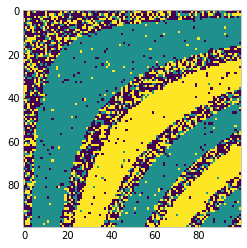

In [191]:
plt.imshow(clf.labels[-1].reshape(n,m))
plt.grid(False)

In [202]:
clf.colors

[array([   0,    2,    4, ..., 9894, 9896, 9898], dtype=int64),
 array([   1,    3,    5, ..., 9895, 9897, 9899], dtype=int64),
 array([ 100,  102,  104, ..., 9994, 9996, 9998], dtype=int64),
 array([ 101,  103,  105, ..., 9995, 9997, 9999], dtype=int64)]

In [192]:
clf.fit(100)

  0%|                                                                                       | 0/100 [00:00<?, ?it/s]..\bayseg\bayseg.py:330: RuntimeWarning: overflow encountered in exp
  acc_ratio = np.exp(log_target_prop - log_target_prev)
100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [02:20<00:00,  1.40s/it]


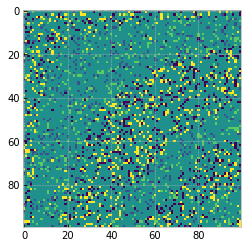

In [198]:
plt.imshow(clf.labels[51].reshape(100,100)-clf.labels[53].reshape(100,100))

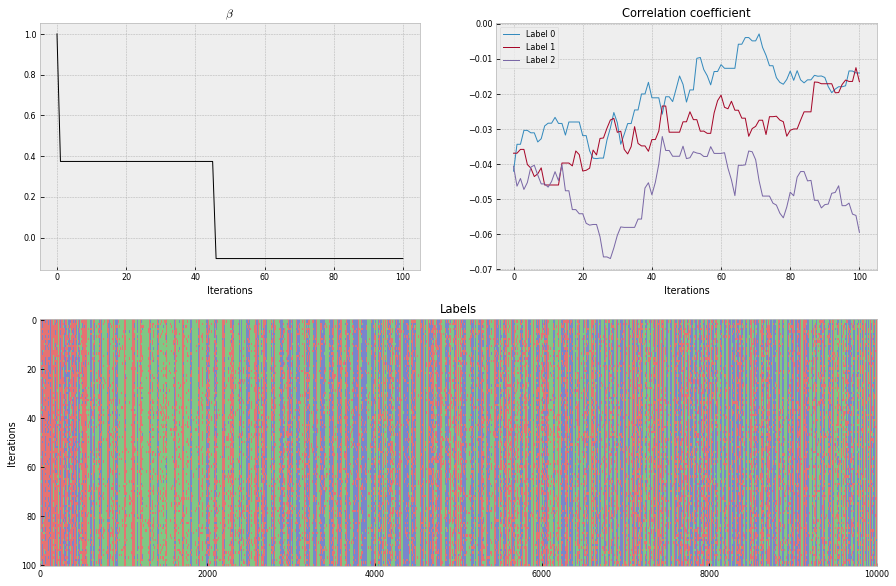

In [200]:
clf.diagnostics_plot()

In [14]:
debug

> c:\users\alexander\documents\git\bayseg\bayseg\bayseg.py(335)gibbs_sample()
    333             print("BETA acceptance ratio:", acc_ratio)
    334 
--> 335         if (acc_ratio > 1) or (np.random.uniform() < acc_ratio):
    336             self.betas.append(beta_prop)
    337         else:

ipdb> acc_ratio
array([[  8.28994330e+16,              nan,              nan,
                     nan],
       [             nan,   8.28994330e+16,              nan,
                     nan],
       [             nan,              nan,   8.28994330e+16,
                     nan],
       [             nan,              nan,              nan,
          8.28994330e+16]])
ipdb> exit


### Pseudocoloring in 2D with 4-stamp

In [12]:
e = 10

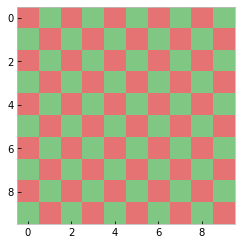

In [13]:
plt.imshow(np.tile(np.kron([[0, 1], [1, 0]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

### Pseudocoloring in 2D with 8-stamp

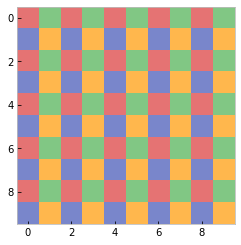

In [14]:
plt.imshow(np.tile(np.kron([[0, 1], [2, 3]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

In [18]:
np.shape(clf.colors)

(4, 25, 2)

### Gibbs energy calculation in 2D

In [17]:
labels = clf.labels[-1]
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

In [24]:
labels_rshp = labels.reshape(clf.shape[:-1])
labels_rshp

array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 2],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 1, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 1, 1, 2, 1, 2, 1, 2, 2],
       [1, 0, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 2, 2, 1, 2, 2, 2, 0, 2, 1]], dtype=int64)

In [27]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [41]:
ui = np.unravel_index(np.arange(100), (10,10))
ui

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9], dtype=int64))

In [42]:
np.ravel_multi_index(ui, (10,10))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [26]:
np.arange(100).reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [167]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

### Flattened Stamps

In [132]:
e_x = clf.shape[0]
e_y = clf.shape[1]
# right
r = 1
# left
l = -1
# up
u = -e_x
ur = -e_x + 1
ul = -e_x - 1
# down
d = +e_x
dr = +e_x + 1
dl = +e_x -1

In [201]:
# comparison array
comparer = np.tile(np.arange(clf.n_labels), (clf.shape[0] * clf.shape[1],1))

In [207]:
comparer[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]))

89

In [228]:
len(comparer[:ul, 0])

89

In [232]:
len(np.not_equal(comparer[:ul, 0], labels[-ul:]).astype(float) * beta)

89

In [233]:
len(gibbs[-ul:])

89

In [283]:
ul

-11

In [323]:
fshape = [ii for ii in fp.shape if ii > 0]

In [324]:
fshape

[3, 3]

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]], dtype=bool)

In [456]:
grid = np.ones((10,10))
grid[:,::2] = 0
#grid[::2,:] = 2
storage_grid = np.ones((10,10))
grid

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

In [391]:
labels = clf.labels[-1]
labels_rshp = labels.reshape((10,10))
labels_rshp

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 0, 2, 0, 0, 0],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 2],
       [2, 1, 0, 0, 0, 0, 1, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 1, 2],
       [2, 1, 1, 2, 2, 2, 2, 2, 2, 0],
       [2, 1, 2, 2, 2, 2, 2, 1, 2, 2]], dtype=int64)

In [428]:
comp = np.tile(np.zeros_like(labels_rshp), (3,1,1))
for l in range(clf.n_labels):
    comp[l,:,:] = l
comp

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [504]:
np.not_equal?

In [527]:
np.not_equal(grid[1:-1,1:-1], grid[0:-2,1:-1])

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [528]:
np.not_equal(grid[1:-1,1:-1], grid[1:-1,0:-2])

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [19]:
obs = np.ones((4, 4, 4))
clf2 = bayseg.BaySeg(obs, 3, stamp=8)

In [18]:
labels = np.array([[1., 1., 2., 1.],
                       [1., 1., 2., 1.],
                       [0., 0., 2., 0.],
                       [0., 0., 2., 0.]])

In [22]:
gibbs_energy_2d(clf2, labels, 1.)

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  4.,  4.,  1.],
        [ 0.,  0.,  4.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  4.,  0.],
        [ 1.,  4.,  4.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  0.,  1.],
        [ 1.,  4.,  0.,  1.],
        [ 1.,  4.,  0.,  1.],
        [ 1.,  1.,  0.,  1.]]])

In [28]:
# comparison array
comp = np.tile(np.zeros_like(labels), (3,1,1)).astype(float)

for i in range(3):
    comp[i,:,:] = i

In [29]:
comp

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]]])

In [33]:
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [50]:
comp[:, :-2, 1:-1]

array([[[ 0.,  0.],
        [ 0.,  0.]],

       [[ 1.,  1.],
        [ 1.,  1.]],

       [[ 2.,  2.],
        [ 2.,  2.]]])

In [49]:
labels[1:-1, 1:-1]

array([[ 1.,  2.],
       [ 0.,  2.]])

In [53]:
 (np.not_equal(comp[:, 1:-1, 1:-1], labels[:-2, 1:-1]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[2:, 1:-1]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, :-2]).astype(float) 
 + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, 2:]).astype(float)) * 1.

array([[[ 3.,  4.],
        [ 2.,  2.]],

       [[ 2.,  2.],
        [ 3.,  4.]],

       [[ 3.,  2.],
        [ 3.,  2.]]])

In [61]:
labels[1:,0]

array([ 1.,  0.,  0.])

In [69]:
comp[:,:,0]

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.]])

In [74]:
labels

array([[ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 0.,  0.,  2.,  0.],
       [ 0.,  0.,  2.,  0.]])

In [107]:
labels[-1,-2]

2.0

[[ 1.  1.  2.  1.]
 [ 1.  1.  2.  1.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  2.  0.]]
[[[ 2.  3.  3.  2.]
  [ 2.  3.  4.  2.]
  [ 1.  2.  2.  2.]
  [ 0.  1.  1.  1.]]

 [[ 0.  1.  1.  1.]
  [ 1.  2.  2.  2.]
  [ 2.  3.  4.  2.]
  [ 2.  3.  3.  2.]]

 [[ 2.  2.  2.  1.]
  [ 3.  3.  2.  2.]
  [ 3.  3.  2.  2.]
  [ 2.  2.  2.  1.]]]


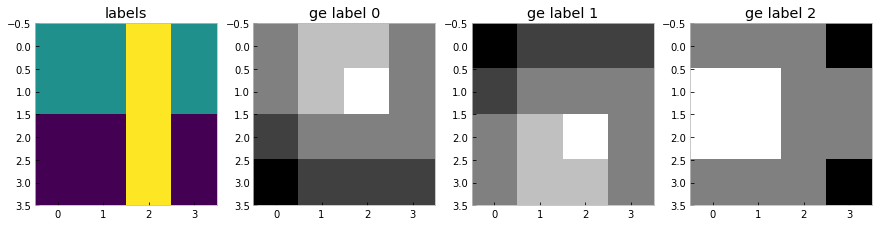

In [109]:
def gibbs_energy_2d(self, labels, beta):
    gibbs_energy = np.tile(np.zeros_like(labels).astype(float), (3,1,1))
    #print(gibbs_energy)
    
    # comparison array
    comp = np.tile(np.zeros_like(labels), (3,1,1)).astype(float)
    
    for i in range(self.n_labels):
        comp[i,:,:] = i
        
    #print(comp)
    #print(np.not_equal(labels[1:-1,1:-1], comp[:,1:-1,0:-2]).astype(float))
    # center image
    
    # above
    gibbs_energy[:,1:-1,1:-1] = (np.not_equal(comp[:, 1:-1, 1:-1], labels[:-2, 1:-1]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[2:, 1:-1]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, :-2]).astype(float) 
                                + np.not_equal(comp[:, 1:-1, 1:-1], labels[1:-1, 2:]).astype(float)) * beta

    # left column
        # right
    gibbs_energy[:,:,0] += np.not_equal(comp[:,:,0], labels[:,1]).astype(float) * beta
        # above
    gibbs_energy[:,1:,0] += np.not_equal(comp[:,1:,0], labels[:-1,1]).astype(float) * beta  
        # below
    gibbs_energy[:,:-1,0] += np.not_equal(comp[:,:-1,0], labels[1:,1]).astype(float) * beta  
    
    # right column
        # left
    gibbs_energy[:,:,-1] += np.not_equal(comp[:,:,-1], labels[:,-2]).astype(float) * beta
        # above
    gibbs_energy[:,1:,-1] += np.not_equal(comp[:,1:,-1], labels[:-1,-1]).astype(float) * beta
        # below
    gibbs_energy[:,:-1,-1] += np.not_equal(comp[:,:-1,-1], labels[1:,-1]).astype(float) * beta
    
    # top row
        # below
    gibbs_energy[:,0,:] += np.not_equal(comp[:,0,:], labels[1,:]).astype(float) * beta
        # right
    gibbs_energy[:,0,:-1] += np.not_equal(comp[:,0,:-1], labels[0,1:]).astype(float) * beta
        # left
    gibbs_energy[:,0,1:] += np.not_equal(comp[:,0,1:], labels[0,:-1]).astype(float) * beta
    
    # bottom row
        # above
    gibbs_energy[:,-1,:] += np.not_equal(comp[:,-1,:], labels[-2,:]).astype(float) * beta
        # right
    gibbs_energy[:,-1,:-1] += np.not_equal(comp[:,-1,:-1], labels[-1,1:]).astype(float) * beta
        # left
    gibbs_energy[:,-1,1:] += np.not_equal(comp[:,-1,1:], labels[-1,:-1]).astype(float) * beta
    
    # corners redo
    # up left
    gibbs_energy[:,0,0] = (np.not_equal(comp[:,0,0], labels[1,0]).astype(float) + np.not_equal(comp[:,0,0], labels[0,1]).astype(float)) * beta
    # low left
    gibbs_energy[:,-1,0] = (np.not_equal(comp[:,-1,0], labels[-1,1]).astype(float) + np.not_equal(comp[:,-1,0], labels[-2,0]).astype(float)) * beta
    # up right
    gibbs_energy[:,0,-1] = (np.not_equal(comp[:,0,-1], labels[1,-1]).astype(float) + np.not_equal(comp[:,0,-1], labels[0,-2]).astype(float)) * beta
    # low right
    gibbs_energy[:,-1,-1] = (np.not_equal(comp[:,-1,-1], labels[-2,-1]).astype(float) + np.not_equal(comp[:,-1,-1], labels[-1,-2]).astype(float)) * beta

    return gibbs_energy

# call
test = np.eye(10,10)
test[:2] = 2
print(labels)
ge = gibbs_energy_2d(clf, labels, 1)
print(ge)
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(labels)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)


In [597]:
test

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [35]:
import skimage.filters as filters

In [40]:
image

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [14]:
strct4 = np.array([[0,1,0],
                   [1,0,1],
                   [0,1,0]]).astype(bool)

strct8 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]).astype(bool)

In [15]:
def f(a, value):
    # print(a)
    a = a[a != -999.]
    # print(a)
    return np.count_nonzero(a != value)

In [16]:
img = np.eye(10)

In [17]:
ge = np.tile(np.zeros_like(img), (3,1,1))
#for i in range(clf.n_labels):
#    ge[i,:,:] = i

In [18]:
from functools import partial

In [19]:
beta = 1.

In [20]:
%%timeit
for i in range(clf.n_labels):
    ge[i,:,:] = scipy.ndimage.generic_filter(img, partial(f, value=i), footprint=strct4, mode="constant", cval=-999) * beta

2.36 ms ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
clf.shape

(10, 10, 4)

In [33]:
clf.feat.shape[0]

100

In [29]:
ge.reshape(100, 3)

array([[ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 2.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 2.,  0.,  2.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 0.,  2.,  1.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  2.,  1.],
       [ 4.,  2.,  4.],
       [ 4.,  4.,  4.],
       [ 4.,  4.,  3.],
       [ 3.,  2.,  4.],
       [ 2.,  4.

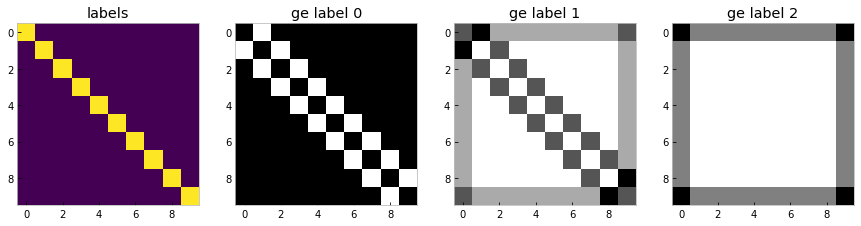

In [230]:
fig, ax = plt.subplots(ncols=clf.n_labels+1, figsize=(15,10))
ax[0].set_title("labels")
ax[0].imshow(img)
ax[0].grid(False)
for i in range(clf.n_labels):
    ax[i+1].set_title("ge label "+str(i))
    ax[i+1].imshow(ge[i,:,:], cmap="gray")
    ax[i+1].grid(False)

In [146]:
scipy.ndimage.generic_filter?

In [80]:
image

array([[2, 2, 2, 2, 1, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [2, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 2, 2, 2, 2, 2, 0, 2, 0, 0],
       [0, 0, 2, 0, 2, 2, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [34]:
import numpy as np
from skimage import util

image = np.eye(10)

windows = util.view_as_windows(image, (3, 3))
windows

array([[[[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  0.]],

        [[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]],

        [[ 0.,  0.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 1.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0